In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
X,y = make_moons(400, noise = 0.1)

In [3]:
X.shape

(400, 2)

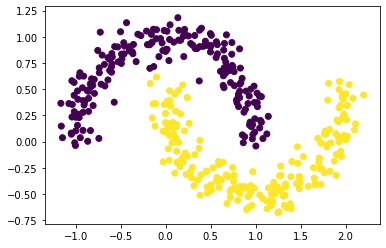

In [4]:
plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

In [5]:
def plotBoundary(predict):
    x1 = np.arange(min(X[:,0]) - 1, max(X[:,0]) + 1, 0.01)
    x2 = np.arange(min(X[:,1]) - 1, max(X[:,1]) + 1, 0.01)
    xx,yy = np.meshgrid(x1,x2)
    x = np.array([xx.flatten(), yy.flatten()]).T
    z = predict(x)
    z = z.reshape(xx.shape)
    plt.figure(figsize=(10,6))
    plt.contourf(xx,yy,z,cmap=plt.cm.Spectral)
    plt.scatter(X[:,0], X[:,1], c = y)
    

In [6]:
logistic = LogisticRegression()

In [7]:
logistic.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

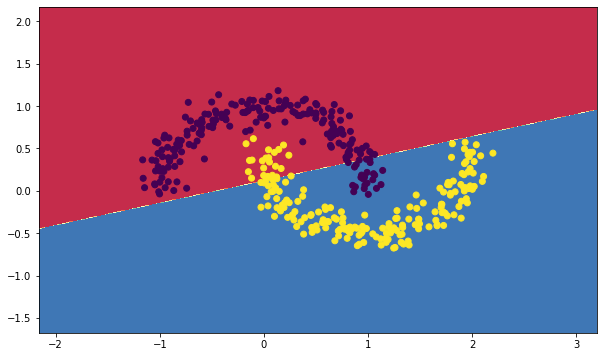

In [8]:
plotBoundary(logistic.predict)

In [9]:
svm = SVC()

In [10]:
svm.fit(X,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

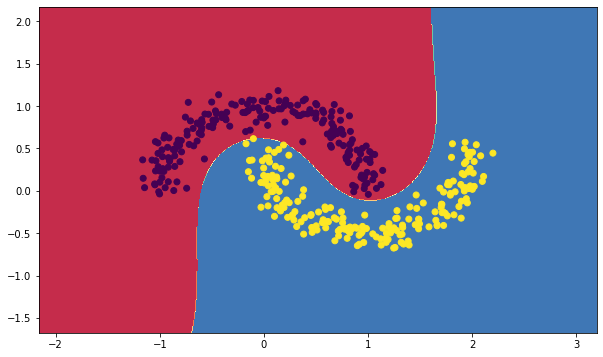

In [11]:
plotBoundary(svm.predict)

In [12]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [13]:
def derivativeSigmoid(x):
    return x * (1 - x)

In [14]:
def predict(X,model):
    wh, bh, wout, bout = model['wh'], model['bh'], model['wout'], model['bout']
    a1 = np.dot(X, wh) + bh
    z1 = sigmoid(a1)
    a2 = np.dot(z1, wout) + bout
    output = sigmoid(a2)
    return output

In [15]:
def build_model(inputNeurons, outputNeurons, hiddenNeurons):
    wh = np.random.uniform(size = (inputNeurons, hiddenNeurons))
    bh = np.random.uniform(size = (1, hiddenNeurons))
    wout = np.random.uniform(size = (hiddenNeurons, outputNeurons))
    bout = np.random.uniform(size = (1, outputNeurons))
    
    for i in range(epochs):
        # feedforward
        a1 = np.dot(X, wh) + bh
        z1 = sigmoid(a1)
        a2 = np.dot(z1, wout) + bout
        output = sigmoid(a2)

        # backpropagation
        error_output_layer = y.reshape(-1,1) - output
        slope_output_layer = derivativeSigmoid(output)
        delta_output_layer = error_output_layer * slope_output_layer

        error_hidden_layer = delta_output_layer.dot(wout.T)
        slope_hidden_layer = derivativeSigmoid(z1)
        delta_hidden_layer = error_hidden_layer * slope_hidden_layer

        wout += z1.T.dot(delta_output_layer) * alpha
        bout += np.sum(delta_output_layer) * alpha
        wh += X.T.dot(delta_hidden_layer) * alpha
        bh += np.sum(delta_hidden_layer) * alpha
        
    model = {'wh' : wh, 'bh' : bh, 'wout' : wout, 'bout' : bout}
    return model

In [16]:
inputNeurons = X.shape[1]
outputNeurons = 1
hiddenNeurons = 5
epochs = 10000
alpha = 0.01

In [17]:
model = build_model(inputNeurons,outputNeurons,hiddenNeurons)

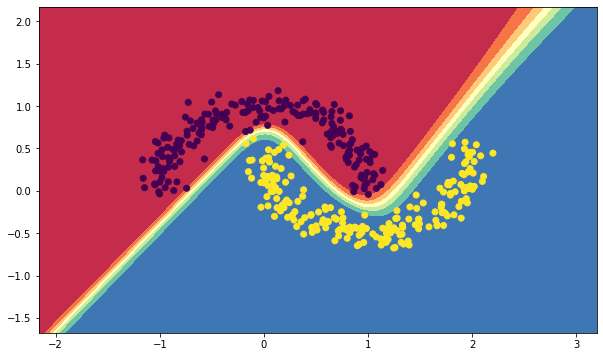

In [18]:
plotBoundary(lambda x : predict(x,model))

In [19]:
hiddenNeurons = [1,3,5,7,10,50]

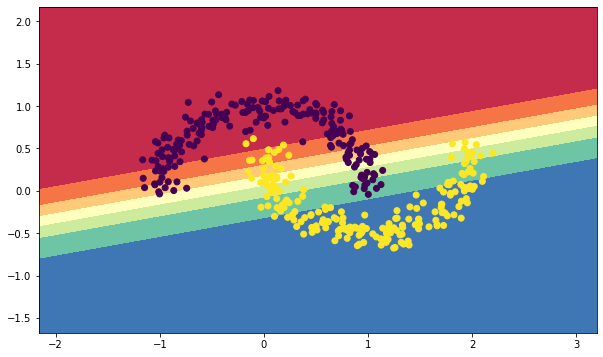

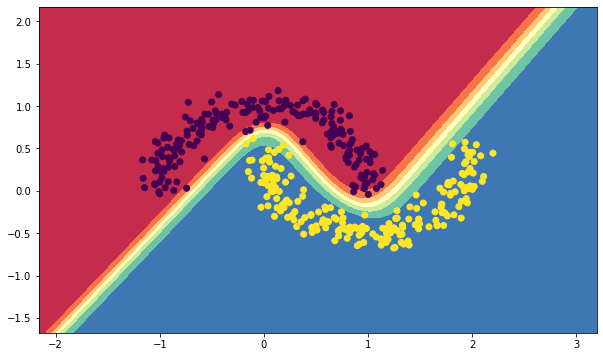

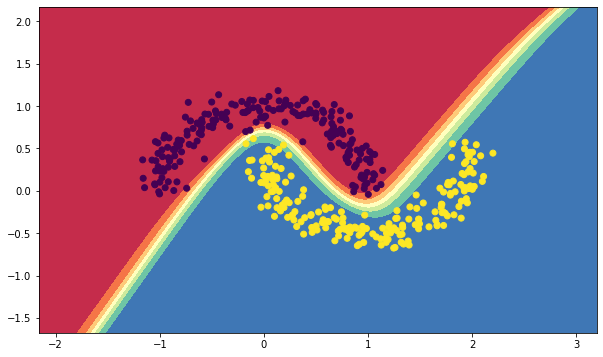

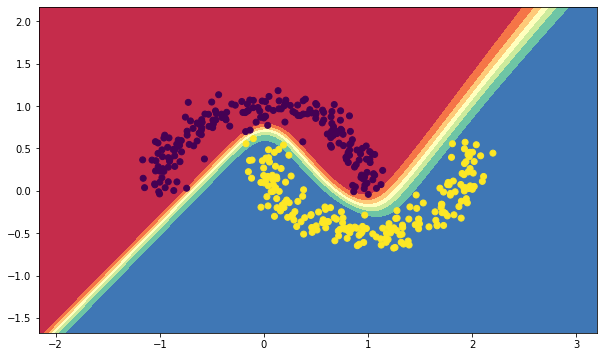

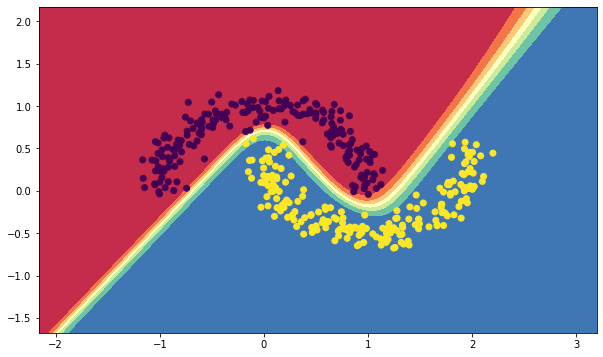

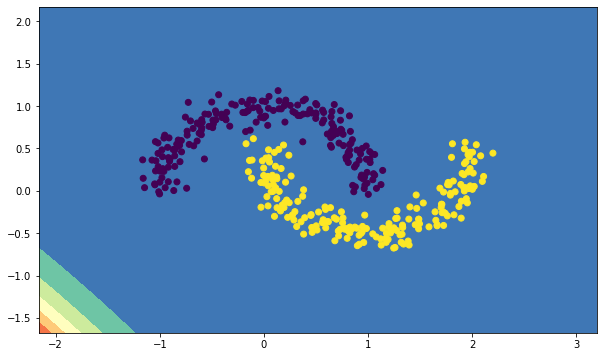

In [20]:
for i in range(len(hiddenNeurons)):
    model = build_model(inputNeurons, outputNeurons, hiddenNeurons[i])
    plotBoundary(lambda x1 : predict(x1, model))